In [68]:
#ml project 2, car price prediction (Parimal Parimal)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(r'C:\Users\admin\Downloads\ML Project 2_ Automobile\AutoData.csv')

In [6]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.shape

(205, 25)

<AxesSubplot:>

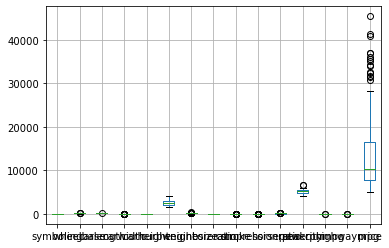

In [8]:
df.boxplot()

In [14]:
df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

<AxesSubplot:>

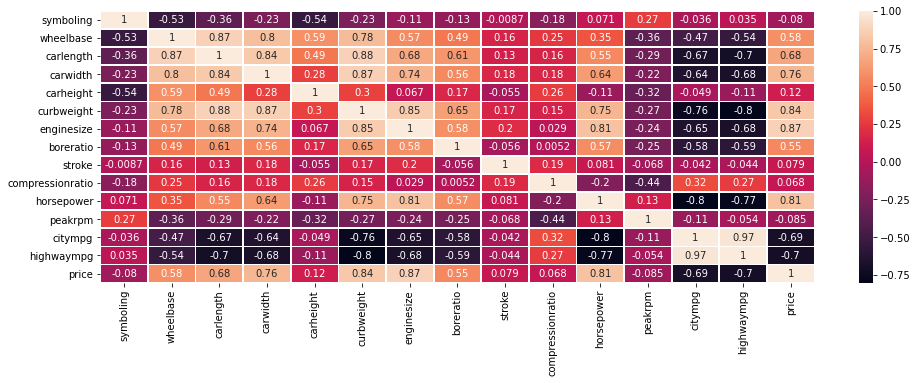

In [10]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True, linewidths= .8)

### Here, enginesize is highly corelated with the price which we are going to predict. 
So, here we choose enginesize as an independent variable to predict the price.

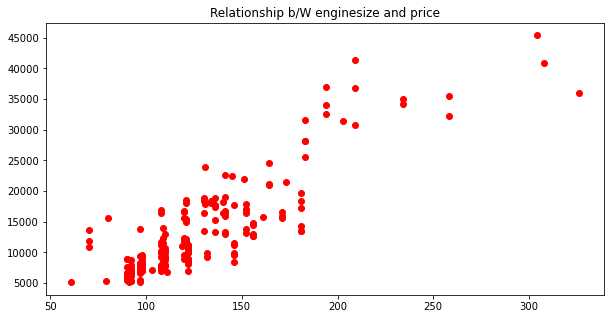

In [11]:
plt.figure(figsize = (10,5))
plt.title("Relationship b/W enginesize and price")
plt.scatter(x = df["enginesize"], y = df["price"], color = "r")
plt.show()

### Smiple Linear Regression Model

<AxesSubplot:>

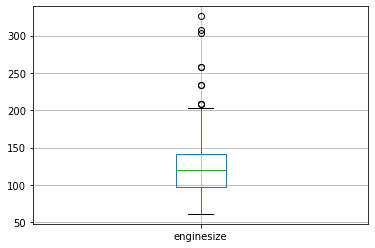

In [16]:
df.boxplot("enginesize")

In [17]:
q1,q2,q3 = np.quantile(df["enginesize"], 0.25), np.quantile(df["enginesize"], 0.50), np.quantile(df["enginesize"], 0.75)
IQR = q3 - q1
uw,lw = q3 + (1.5 * IQR),q1 - (1.5 * IQR)
print(q1,q2,q3)
print(IQR)
print(uw,lw)

97.0 120.0 141.0
44.0
207.0 31.0


In [18]:
df["enginesize"] = np.where(df["enginesize"] > uw, uw, df["enginesize"])
df["enginesize"] = np.where(df["enginesize"] < lw, lw, df["enginesize"])

<AxesSubplot:>

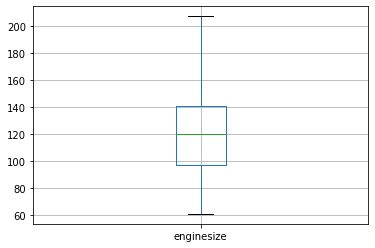

In [19]:
df.boxplot("enginesize")

In [20]:
x = df[["enginesize"]]
x.head(2)

,enginesize
0,130.0
1,130.0


In [21]:
y = df["price"]
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

<AxesSubplot:>

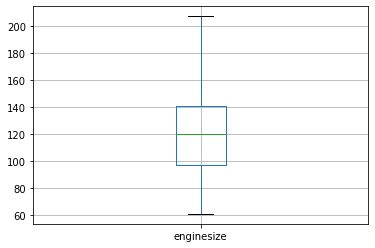

In [22]:
x.boxplot()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train.head()

,enginesize
4,136.0
71,207.0
134,121.0
145,108.0
122,98.0


In [25]:
y_train.head()

4      17450.0
71     34184.0
134    15040.0
145    11259.0
122     7609.0
Name: price, dtype: float64

In [26]:
x_test.head()

,enginesize
52,91.0
181,161.0
5,136.0
18,61.0
188,109.0


In [27]:
y_test.head()

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
Name: price, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
model = lin.fit(x_train,y_train)

In [29]:
y_pred = model.predict(x_test)

In [35]:
x_test.shape

(41, 1)

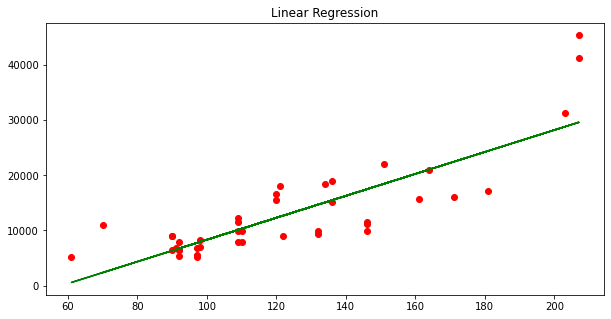

In [36]:
plt.figure(figsize = (10,5))
plt.title("Linear Regression")
plt.scatter(x_test, y_test, color = "r")
plt.plot(x_test,y_pred , c = "g")
plt.show()

In [37]:
print("R squared score", model.score(x_test,y_test))

R squared score 0.7021721176355946


In [38]:
print("R squared score", model.score(x_test,y_pred))

R squared score 1.0


In [39]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [40]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_error(y_test, y_pred)

In [41]:
print(mse)
print(mape)

23056750.029678818
3498.570596914641


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,124.570732,33.974343,61.00,97.00,120.00,141.00,207.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [43]:
import math
rmse = math.sqrt(mse)
print(rmse)

4801.744477757934


In [46]:
def mape(ad , pd):
    return round((np.abs((y_test-y_pred)/y_test).mean())*100,2)

In [47]:
mape(y_test,y_pred)

27.82

### Without train_test_split

In [48]:
lin = LinearRegression()
model = lin.fit(x,y)

In [49]:
y_pred = model.predict(x)

In [52]:
df["Predicted Price"] = y_pred
df

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Predicted Price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,14367.655602
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,14367.655602
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,18788.286413
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,10147.962556
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,15573.282187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,16577.971008
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,16577.971008
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,23007.979460
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,17381.722064


In [55]:
print("R squared score", model.score(x,y))

R squared score 0.7302246432537469


In [56]:
print("R squared score", model.score(x,y_pred))

R squared score 1.0


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.000000,0.000000,1.000000,2.000000,3.00000
wheelbase,205.0,98.756585,6.021776,86.600000,94.500000,97.000000,102.400000,120.90000
carlength,205.0,174.049268,12.337289,141.100000,166.300000,173.200000,183.100000,208.10000
carwidth,205.0,65.907805,2.145204,60.300000,64.100000,65.500000,66.900000,72.30000
carheight,205.0,53.724878,2.443522,47.800000,52.000000,54.100000,55.500000,59.80000
curbweight,205.0,2555.565854,520.680204,1488.000000,2145.000000,2414.000000,2935.000000,4066.00000
enginesize,205.0,124.570732,33.974343,61.000000,97.000000,120.000000,141.000000,207.00000
boreratio,205.0,3.329756,0.270844,2.540000,3.150000,3.310000,3.580000,3.94000
stroke,205.0,3.255415,0.313597,2.070000,3.110000,3.290000,3.410000,4.17000
compressionratio,205.0,10.142537,3.972040,7.000000,8.600000,9.000000,9.400000,23.00000


In [62]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [63]:
mse1 = mean_squared_error(y, y_pred)
mape1 = mean_absolute_error(y, y_pred)

In [64]:
print(mse1)
print(mape1)

17133550.50531351
2915.4701033269935


In [65]:
import math
rmse = math.sqrt(mse)
print(rmse)

4139.269320219875


In [66]:
def mape(ad , pd):
    return round((np.abs((y-y_pred)/y).mean())*100,2)

In [67]:
mape(y,y_pred)

22.27

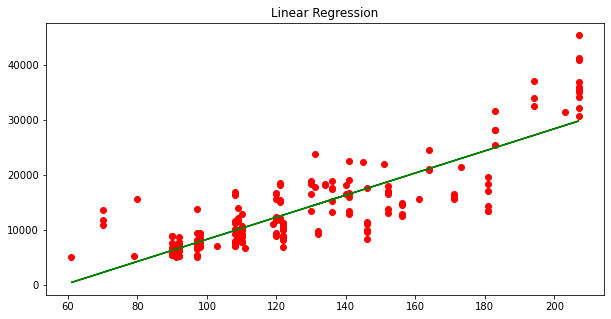

In [69]:
plt.figure(figsize = (10,5))
plt.title("Linear Regression")
plt.scatter(x,y, color = "r")
plt.plot(x,y_pred, c = "g")
plt.show()

### 2) Multiple Linear Regression Model

In [80]:
x = df.iloc[:, :-2]
print('Indepent Variables are:')
x.head()

Indepent Variables are:


,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22


In [82]:
y = df.iloc[:, -2:-1]
print('Target Variable is:')
y.head()

Target Variable is:


,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [86]:
df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
Predicted Price     float64
dtype: object

In [104]:
x.drop(['make','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber'], axis = 1, inplace = True)

KeyError: "['make' 'fueltype' 'aspiration' 'doornumber' 'carbody' 'drivewheel'\n 'enginelocation' 'enginetype' 'cylindernumber'] not found in axis"

In [105]:
x.dtypes

symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [106]:
x.drop(['fuelsystem'], axis = 1, inplace = True)

In [107]:
x.dtypes

symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize          float64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [109]:
a = [x_train, x_test, y_train, y_test]
for i in a:
    print(i.head(2))
    print("======="*5)

    symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
4           2       99.4      176.6      66.4       54.3        2824   
71         -1      115.6      202.6      71.7       56.5        3740   

    enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
4        136.0       3.19     3.4               8.0         115     5500   
71       207.0       3.46     3.1               8.3         155     4750   

    citympg  highwaympg  
4        18          22  
71       16          18  
     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
52           1       93.1      159.1      64.2       54.1        1905   
181         -1      104.5      187.8      66.5       54.1        3151   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
52         91.0       3.03    3.15               9.0          68     5000   
181       161.0       3.27    3.35               9.2         156     5200   

     citympg  highwaympg

In [110]:
from sklearn.ensemble import RandomForestRegressor
R = RandomForestRegressor()
R.fit(x_train,y_train)

y_pred = R.predict(x_test)

<ipython-input-110-f93bbadadd99>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R.fit(x_train,y_train)


In [122]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1828.4972770731704
7486393.105099999
2736.1273919720916


### Feature Selection

In [116]:
import pandas as pd
feature_imp = pd.Series(R.feature_importances_, index = x.columns).sort_values(ascending=False)
feature_imp

enginesize          0.658887
curbweight          0.193251
highwaympg          0.035645
horsepower          0.023990
carwidth            0.019535
wheelbase           0.016468
citympg             0.011612
carlength           0.009912
peakrpm             0.009174
stroke              0.005249
carheight           0.005160
boreratio           0.004700
compressionratio    0.004465
symboling           0.001953
dtype: float64

No handles with labels found to put in legend.


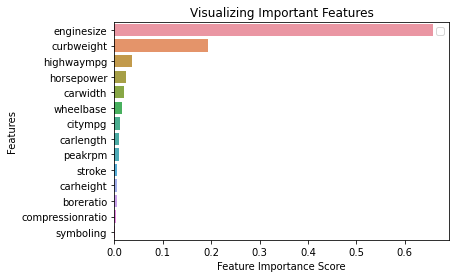

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [119]:
x = df[['enginesize','curbweight','highwaympg','horsepower','carwidth','wheelbase']]
y = df["price"]

In [120]:
x.head()

,enginesize,curbweight,highwaympg,horsepower,carwidth,wheelbase
0,130.0,2548,27,111,64.1,88.6
1,130.0,2548,27,111,64.1,88.6
2,152.0,2823,26,154,65.5,94.5
3,109.0,2337,30,102,66.2,99.8
4,136.0,2824,22,115,66.4,99.4


In [121]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

### Multiple Linear Regression Model Building

In [123]:
from sklearn import linear_model as lm

In [124]:
from sklearn.metrics import mean_squared_error
lin_model = lm.LinearRegression()

In [125]:
model = lin_model.fit(x,y)
model

LinearRegression()

In [126]:
model.score(x, y)

0.8000262809551342

In [127]:
# Slope
model.coef_

array([ 73.34715016,   2.92720055,  72.42147601,  69.86467067,
       516.75806349,  75.36491895])

In [128]:
# Intercept
model.intercept_

-54343.176780422014

In [129]:
y_hat = model.predict(x)
print('Predicted Price are:\n', y_hat)

Predicted Price are:
 [12162.34173783 12162.34173783 18680.83286714 11522.17368508
 15330.16796512 14248.6566253  18322.77884963 18644.77091061
 20398.25837294 19560.34490838 10858.36761805 10858.36761805
 17212.74813896 17373.74416945 19263.89914912 26974.56718564
 27930.40533229 30191.60861322  -498.71371173  5736.08866662
  5838.54068602  5500.43045192  5283.1660239   8403.62475949
  5549.54127435  5613.93968654  5613.93968654  8588.03839441
 11514.13127234 18684.38741044  4929.4084251   5338.51213976
  4196.30670191  5989.7842337   6036.61944257  6405.71004557
  6395.01504698  9633.84098059  9788.98260997  9832.89061828
  8636.69348455 10990.0325875  11047.36030029  7231.45187982
  5736.08866662  5838.54068602 11703.80152727 30896.46789852
 30896.46789852 36108.17531454  5052.02792381  5588.25026139
  5602.88626416  5719.97428634  5734.61028911  7613.16828294
  7613.16828294  7627.80428572 11073.30265372 11583.1336439
 11656.31365775 11583.1336439  11656.31365775 11079.83262278
 11

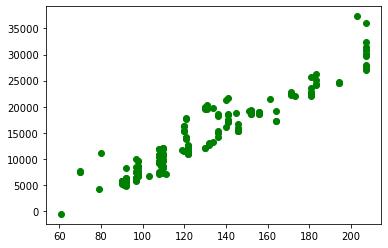

In [130]:
plt.scatter(x['enginesize'], y_hat, color = 'g')
plt.show()

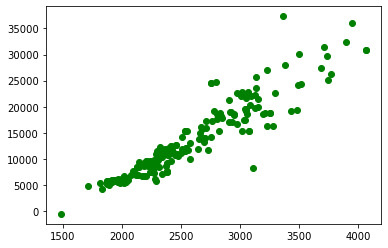

In [131]:
plt.scatter(x['curbweight'], y_hat, color = 'g')
plt.show()

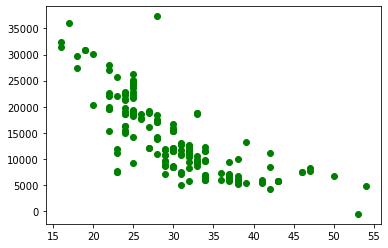

In [132]:
plt.scatter(x['highwaympg'], y_hat, color = 'g')
plt.show()

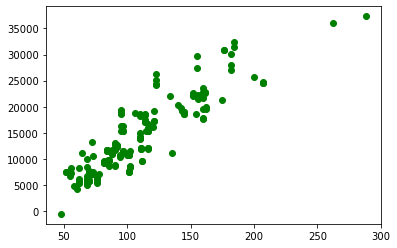

In [133]:
plt.scatter(x['horsepower'], y_hat, color = 'g')
plt.show()

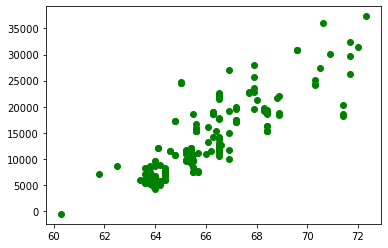

In [134]:
plt.scatter(x['carwidth'], y_hat, color = 'g')
plt.show()

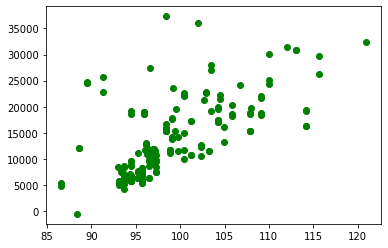

In [135]:
plt.scatter(x['wheelbase'], y_hat, color = 'g')
plt.show()

In [137]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
enginesize,205.0,124.570732,33.974343,61.0,97.0,120.0,141.0,207.0
curbweight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
highwaympg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0
horsepower,205.0,104.117073,39.544167,48.0,70.0,95.0,116.0,288.0
carwidth,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
wheelbase,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


In [138]:
print('Mean Squared Error is:', mean_squared_error(y, y_hat))

Mean Squared Error is: 12700418.067515615


In [139]:
print('Root Mean Squared Error is:', np.sqrt(mean_squared_error(y, y_hat)))

Root Mean Squared Error is: 3563.7645920452737


In [140]:
# OLS = Ordinary Least Squares
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              548.3
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                   7.83e-121
Time:                        16:34:28   Log-Likelihood:                         -1975.1
No. Observations:                 205   AIC:                                      3962.
Df Residuals:                     199   BIC:                                      3982.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

After applying random forest regressor and feature scaling we made the multiple linear regression model which gives us a 94.1 %  adjusted R2 score.

so, if we compare both the model simple linear regression and multiple linear regression then the multiple linear regression model has good R2 score. So we can use 2nd model for prediction.

Here, the 65% weight is by only one column "enginesize" , so this column is drive the price. 